# Titanic Project

Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Titanic_Dataset")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Checking the type of data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#Data Studying
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis for better understaning & cleaning the data

In [5]:
#Checking the null value-null value found
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

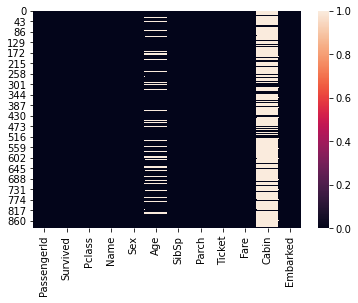

In [6]:
sns.heatmap(df.isnull())

In [7]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="median")
df["Age"]=imp.fit_transform(df["Age"].values.reshape(-1,1))

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Cabin"]=imp.fit_transform(df["Cabin"].values.reshape(-1,1))

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Embarked"]=imp.fit_transform(df["Embarked"].values.reshape(-1,1))

In [10]:
#now we can that the data has been converted
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
#Lets Convert the usable object data (Sex,Cabin & Embarked) into float using lebel enconding. Name and Ticket will be dropped as they will not having an impact on results. 
le=LabelEncoder()
df["Cabin"]=le.fit_transform(df["Cabin"].astype(str))
df["Sex"]=le.fit_transform(df["Sex"].astype(str))
df["Embarked"]=le.fit_transform(df["Embarked"].astype(str))

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,89,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,127,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,89,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,98,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,89,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,89,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,71,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,89,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,104,0


<AxesSubplot:xlabel='Survived', ylabel='Count'>

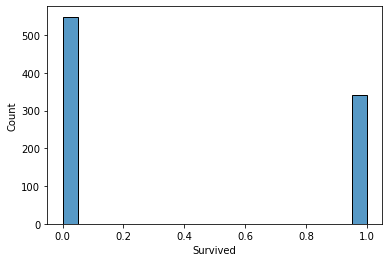

In [17]:
sns.histplot(df["Survived"],bins=20)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

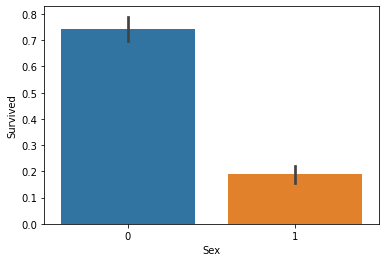

In [18]:
sns.barplot(x="Sex",y="Survived",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

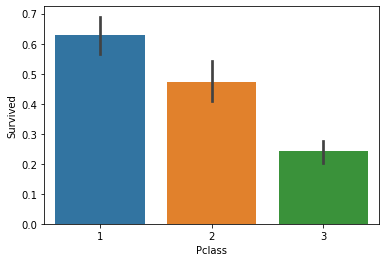

In [19]:
sns.barplot(x="Pclass",y="Survived",data=df)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Cabin'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

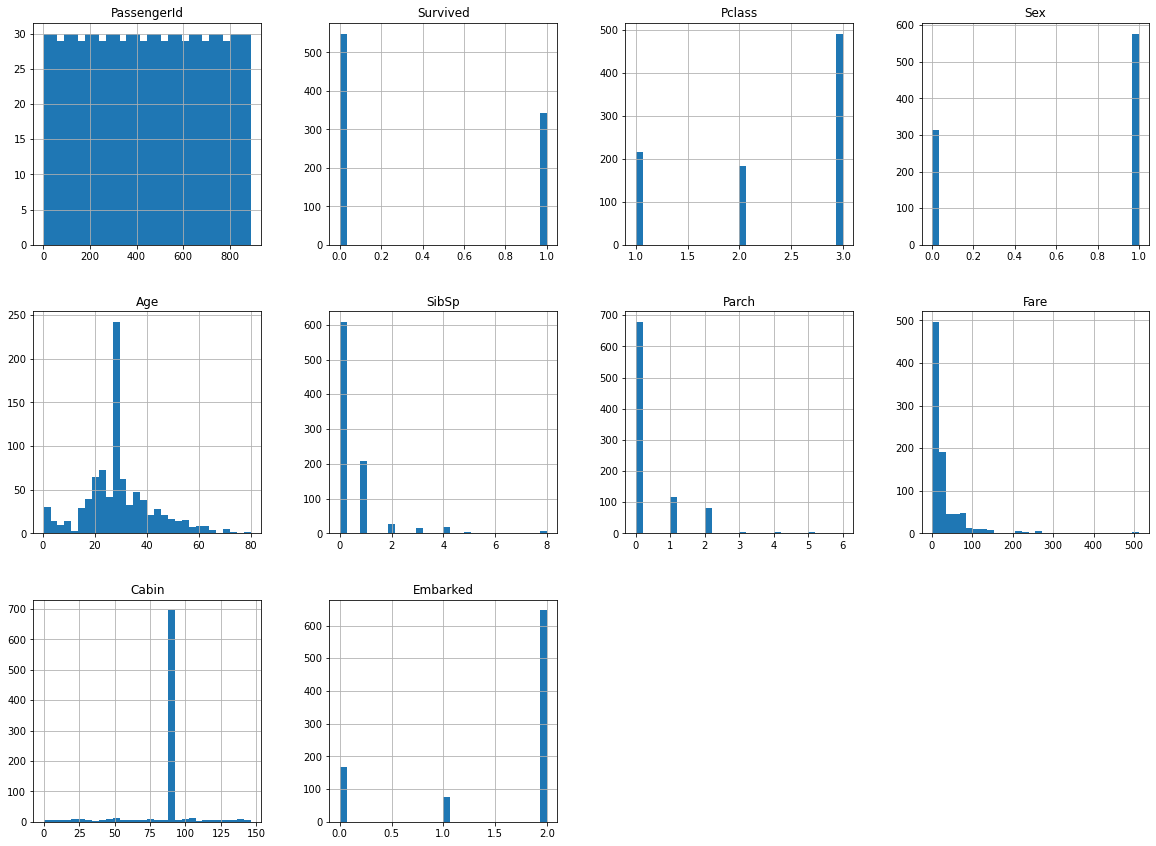

In [20]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Fr

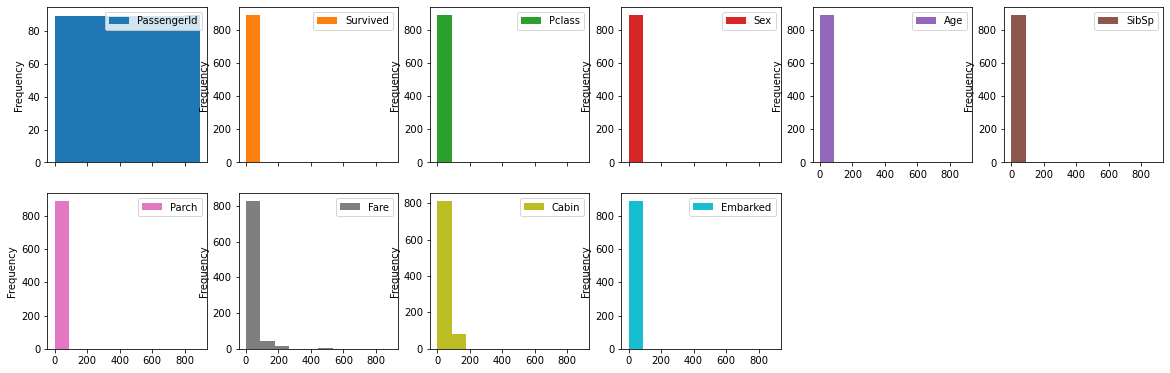

In [21]:
df.plot(kind="hist",subplots=True,layout=(6,6),figsize=(20,20))

In [23]:
df1 = pd.cut(x=df['Age'], bins=[20, 29, 39, 49,59,69,79,89])

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,89,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,127,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,89,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,98,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,89,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,89,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,71,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,89,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,104,0


In [25]:
df1

0      (20.0, 29.0]
1      (29.0, 39.0]
2      (20.0, 29.0]
3      (29.0, 39.0]
4      (29.0, 39.0]
           ...     
886    (20.0, 29.0]
887             NaN
888    (20.0, 29.0]
889    (20.0, 29.0]
890    (29.0, 39.0]
Name: Age, Length: 891, dtype: category
Categories (7, interval[int64]): [(20, 29] < (29, 39] < (39, 49] < (49, 59] < (59, 69] < (69, 79] < (79, 89]]

<AxesSubplot:xlabel='Age', ylabel='Survived'>

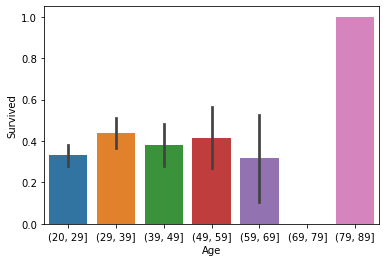

In [26]:
sns.barplot(x=df1,y=df["Survived"])

<AxesSubplot:>

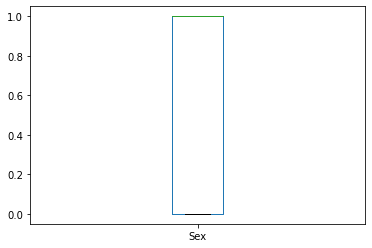

In [27]:
#Spotting Outliers
df["Sex"].plot.box()

<AxesSubplot:>

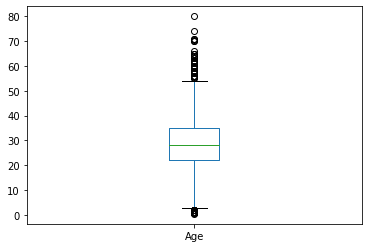

In [28]:
df["Age"].plot.box()

<AxesSubplot:>

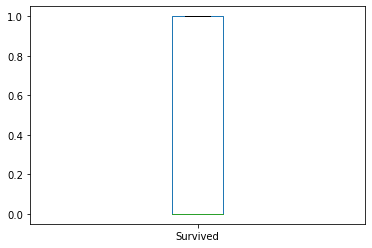

In [29]:
df["Survived"].plot.box()

<AxesSubplot:>

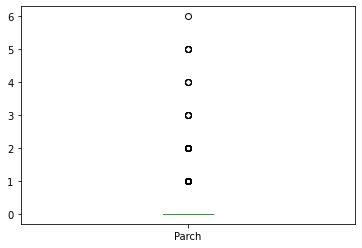

In [30]:
df["Parch"].plot.box()

In [ ]:
df["Fare"].plot.box()

In [ ]:
df["Embarked"].plot.box()

PassengerId       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Survived       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Pclass         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Sex            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Age            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
SibSp          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Parch          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Fare                 AxesSubplot(0.125,0.125;0.0945122x0.343182)
Cabin             AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Embarked          AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

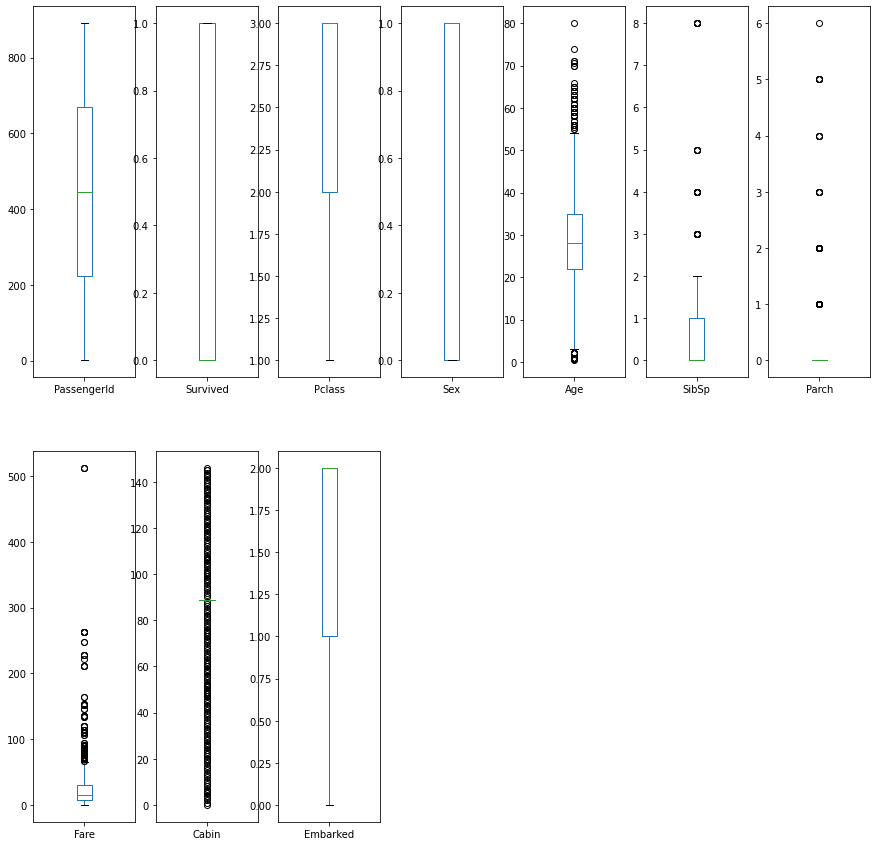

In [31]:
df.plot(kind="box",subplots=True,layout=(2,7),figsize=(15,15))

#We can see that some outlers are present in some columns like Age, Fare, Pach Etc

In [32]:
#Checking Correlation between the different data
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.032448,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.103156,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.153692,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.009653,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.070494,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.043497,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.003543,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.000083,-0.224719
Cabin,-0.032448,-0.103156,0.153692,0.009653,-0.070494,0.043497,-0.003543,-0.000083,1.000000,-0.017208
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,-0.017208,1.000000


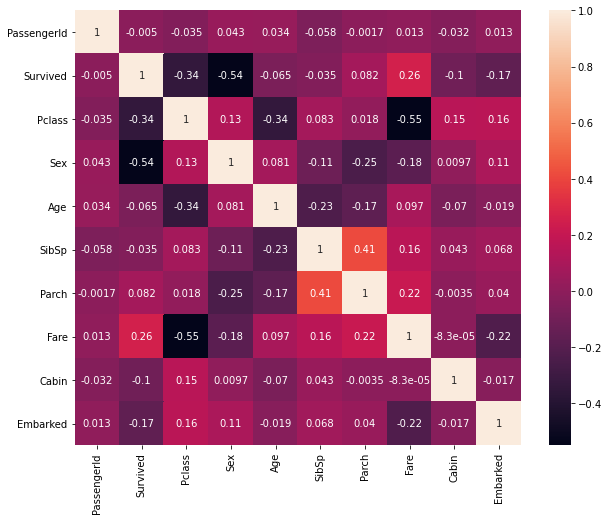

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#we can see that the columns are not so correlated.   

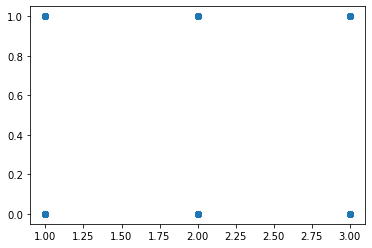

In [35]:
plt.scatter(df["Pclass"],df["Survived"])
plt.show()

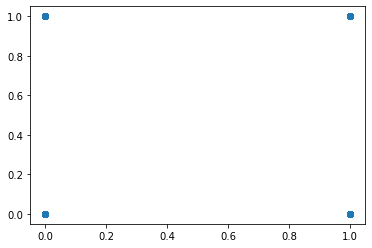

In [36]:
plt.scatter(df["Sex"],df["Survived"])
plt.show()

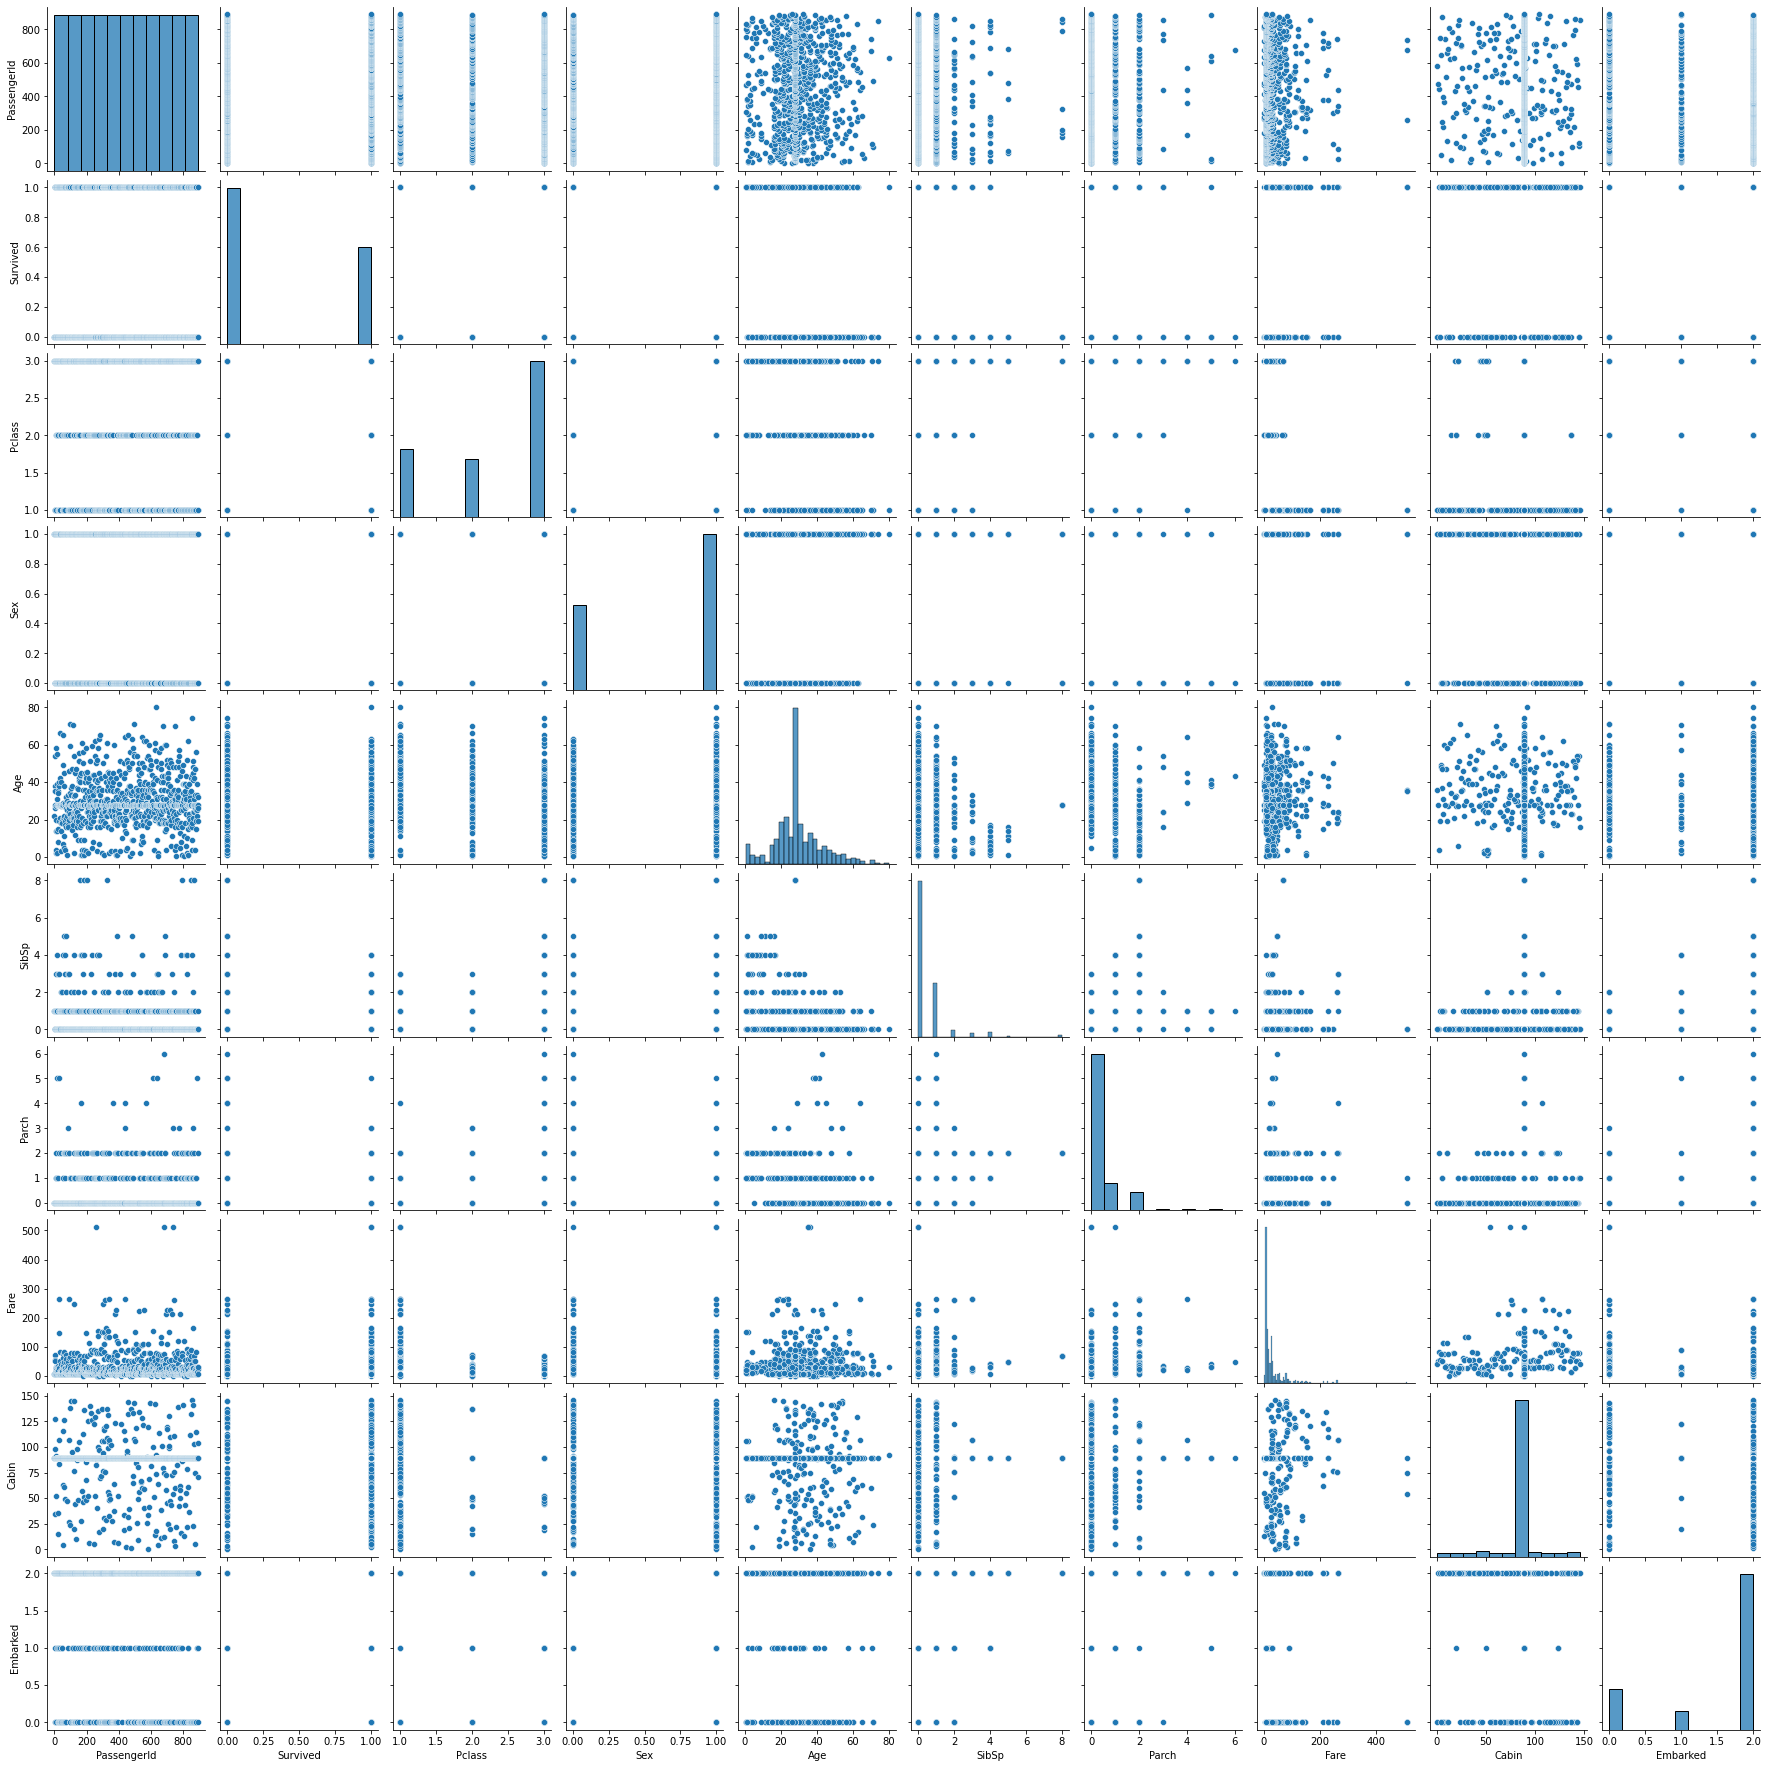

In [37]:
sns.pairplot(df)

In [39]:
#Lets check the skewness 
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin         -1.561409
Embarked      -1.264823
dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

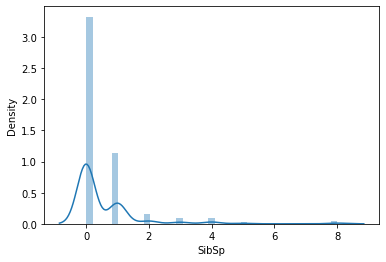

In [40]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

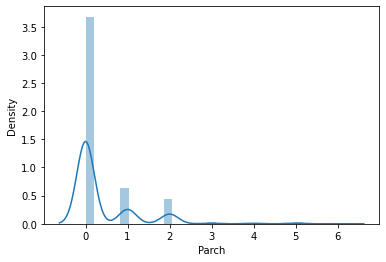

In [41]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

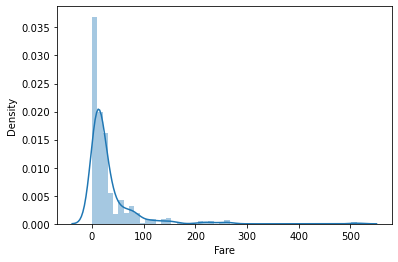

In [42]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

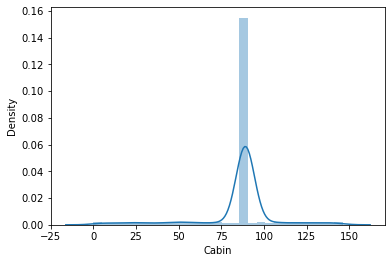

In [43]:
sns.distplot(df['Cabin'])

In [44]:
df2=df
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,89,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,127,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,89,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,98,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,89,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,89,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,71,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,89,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,104,0


In [45]:
df2.drop('Name',axis=1,inplace=True)
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,89,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,127,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,89,2
3,4,1,1,0,35.0,1,0,113803,53.1000,98,2
4,5,0,3,1,35.0,0,0,373450,8.0500,89,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,89,2
887,888,1,1,0,19.0,0,0,112053,30.0000,71,2
888,889,0,3,0,28.0,1,2,W./C. 6607,23.4500,89,2
889,890,1,1,1,26.0,0,0,111369,30.0000,104,0


In [46]:
df2.drop('PassengerId',axis=1,inplace=True)

In [47]:
df2.drop('Ticket',axis=1,inplace=True)

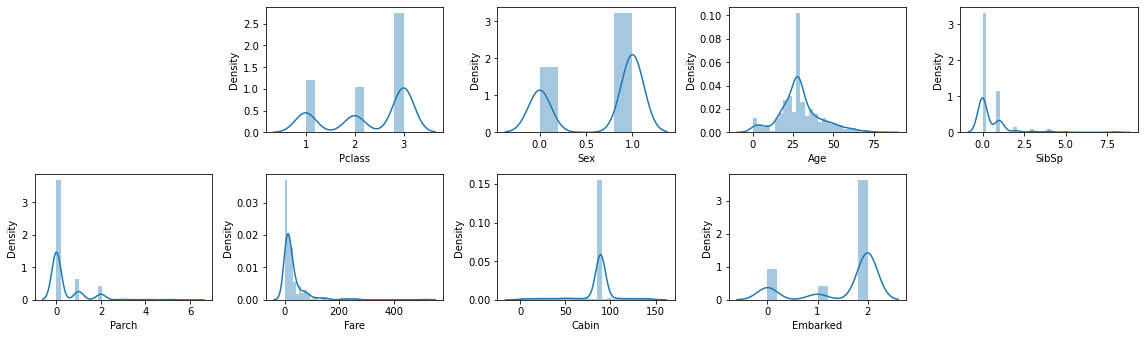

In [48]:
collist=df2.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [49]:
#lets remove the skewness with the heplp of log1p 
import numpy as np
skew=("Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked")
for i in skew:
    if df2.skew().loc[i]>0.55:
        df2[i]=np.log1p(df2[i])

In [50]:
#now we can see the skewness is removed
df2.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Cabin      -1.561409
Embarked   -1.264823
dtype: float64

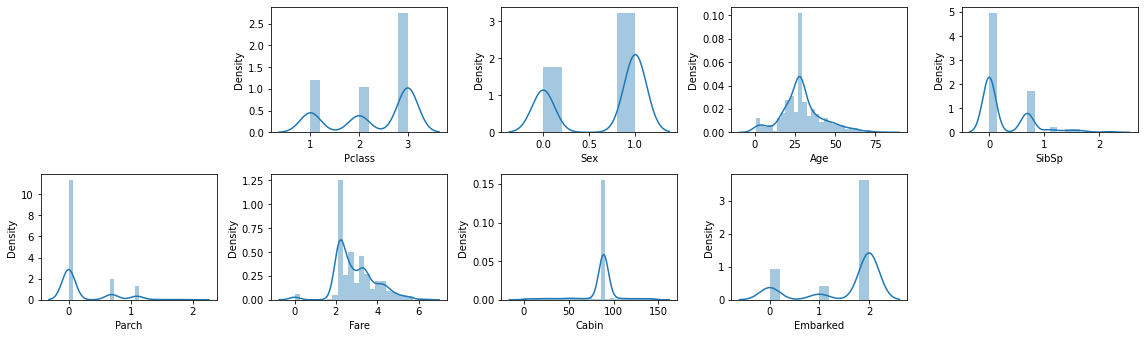

In [51]:
collist=df2.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [52]:
#Identifying outliers and removing them 
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.87974057, 0.16498506,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 1.36121993, 1.98100076,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.79853997, 0.16498506,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.24200664, 0.16498506,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.48708246, 0.88183337,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.81898658, 0.16498506,
        0.67817453]])

In [53]:
threshold=3
print(np.where(z>3))

(array([ 13,  21,  25,  52,  59,  71,  96, 116, 123, 136, 159, 167, 179,
       180, 201, 215, 248, 258, 263, 271, 275, 277, 302, 303, 324, 360,
       366, 386, 393, 413, 429, 438, 445, 460, 466, 475, 480, 481, 493,
       515, 567, 583, 597, 610, 625, 627, 630, 633, 638, 645, 659, 672,
       674, 678, 679, 681, 683, 717, 732, 737, 740, 745, 748, 751, 782,
       792, 806, 806, 815, 822, 823, 846, 851, 863, 871, 885], dtype=int64), array([5, 7, 5, 7, 4, 4, 3, 3, 7, 7, 4, 5, 6, 4, 4, 7, 7, 6, 6, 6, 7, 6,
       6, 7, 4, 5, 7, 4, 7, 6, 7, 5, 7, 7, 6, 7, 4, 6, 3, 7, 5, 7, 6, 5,
       7, 7, 3, 6, 5, 7, 7, 3, 6, 5, 6, 7, 4, 7, 6, 6, 7, 3, 7, 7, 7, 4,
       6, 7, 6, 6, 7, 4, 3, 4, 7, 5], dtype=int64))


In [54]:
df2=df2[(z<3).all(axis=1)]

In [55]:
df2.shape

(816, 9)

In [56]:
df.shape

(891, 9)

In [57]:
#Let's start tesing the model testing and prediction  

In [58]:
x=df2.iloc[:,1:30]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,0.693147,0.0,2.110213,89,2
1,1,0,38.0,0.693147,0.0,4.280593,127,0
2,3,0,26.0,0.000000,0.0,2.188856,89,2
3,1,0,35.0,0.693147,0.0,3.990834,98,2
4,3,1,35.0,0.000000,0.0,2.202765,89,2


In [59]:
y=df2.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
x.shape

(816, 8)

In [61]:
y.shape

(816,)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [63]:
LG=LogisticRegression()

In [64]:
LG.fit(x_train,y_train)

LogisticRegression()

In [65]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.7703703703703704
[[124  30]
 [ 32  84]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       154
           1       0.74      0.72      0.73       116

    accuracy                           0.77       270
   macro avg       0.77      0.76      0.77       270
weighted avg       0.77      0.77      0.77       270



In [66]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5888888888888889
[[141  13]
 [ 98  18]]
              precision    recall  f1-score   support

           0       0.59      0.92      0.72       154
           1       0.58      0.16      0.24       116

    accuracy                           0.59       270
   macro avg       0.59      0.54      0.48       270
weighted avg       0.59      0.59      0.51       270



In [67]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5703703703703704
[[154   0]
 [116   0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       154
           1       0.00      0.00      0.00       116

    accuracy                           0.57       270
   macro avg       0.29      0.50      0.36       270
weighted avg       0.33      0.57      0.41       270



In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.762962962962963
[[126  28]
 [ 36  80]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       154
           1       0.74      0.69      0.71       116

    accuracy                           0.76       270
   macro avg       0.76      0.75      0.76       270
weighted avg       0.76      0.76      0.76       270



In [69]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.7037037037037037
[[132  22]
 [ 58  58]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       154
           1       0.72      0.50      0.59       116

    accuracy                           0.70       270
   macro avg       0.71      0.68      0.68       270
weighted avg       0.71      0.70      0.69       270



In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8037037037037037
[[137  17]
 [ 36  80]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       154
           1       0.82      0.69      0.75       116

    accuracy                           0.80       270
   macro avg       0.81      0.79      0.79       270
weighted avg       0.81      0.80      0.80       270



In [71]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7592592592592593
[[125  29]
 [ 36  80]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       154
           1       0.73      0.69      0.71       116

    accuracy                           0.76       270
   macro avg       0.76      0.75      0.75       270
weighted avg       0.76      0.76      0.76       270



In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8037037037037037
[[138  16]
 [ 37  79]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.75       116

    accuracy                           0.80       270
   macro avg       0.81      0.79      0.79       270
weighted avg       0.81      0.80      0.80       270



In [73]:
#let us use the standard scaler to see if we can find the better results of prediction with different models
df3=df2
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,0.693147,0.000000,2.110213,89,2
1,1,1,0,38.0,0.693147,0.000000,4.280593,127,0
2,1,3,0,26.0,0.000000,0.000000,2.188856,89,2
3,1,1,0,35.0,0.693147,0.000000,3.990834,98,2
4,0,3,1,35.0,0.000000,0.000000,2.202765,89,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.000000,0.000000,2.639057,89,2
887,1,1,0,19.0,0.000000,0.000000,3.433987,71,2
888,0,3,0,28.0,0.693147,1.098612,3.196630,89,2
889,1,1,1,26.0,0.000000,0.000000,3.433987,104,0


In [74]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df3=scale.fit_transform(df3)
df3

array([[-0.79293286,  0.80333162,  0.74251653, ..., -0.97454549,
         0.0503045 ,  0.59333914],
       [ 1.26114083, -1.63807845, -1.34677136, ...,  1.53374717,
         2.38539733, -1.92835222],
       [ 1.26114083,  0.80333162, -1.34677136, ..., -0.88365819,
         0.0503045 ,  0.59333914],
       ...,
       [-0.79293286,  0.80333162, -1.34677136, ...,  0.28101894,
         0.0503045 ,  0.59333914],
       [ 1.26114083, -1.63807845,  0.74251653, ...,  0.55533073,
         0.97205167, -1.92835222],
       [-0.79293286,  0.80333162,  0.74251653, ..., -0.90654394,
         0.0503045 , -0.66750654]])

In [75]:
df3=pd.DataFrame(df3)
df3.columns=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]

In [76]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,-0.792933,0.803332,0.742517,-0.543745,1.013127,-0.515804,-0.974545,0.050305,0.593339
1,1.261141,-1.638078,-1.346771,0.748612,1.013127,-0.515804,1.533747,2.385397,-1.928352
2,1.261141,0.803332,-1.346771,-0.220656,-0.621251,-0.515804,-0.883658,0.050305,0.593339
3,1.261141,-1.638078,-1.346771,0.506295,1.013127,-0.515804,1.198875,0.603353,0.593339
4,-0.792933,0.803332,0.742517,0.506295,-0.621251,-0.515804,-0.867584,0.050305,0.593339
...,...,...,...,...,...,...,...,...,...
811,-0.792933,-0.417373,0.742517,-0.139884,-0.621251,-0.515804,-0.363364,0.050305,0.593339
812,1.261141,-1.638078,-1.346771,-0.786062,-0.621251,-0.515804,0.555331,-1.055792,0.593339
813,-0.792933,0.803332,-1.346771,-0.059111,1.013127,2.448809,0.281019,0.050305,0.593339
814,1.261141,-1.638078,0.742517,-0.220656,-0.621251,-0.515804,0.555331,0.972052,-1.928352


In [77]:
x=df3.iloc[:,1:30]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.803332,0.742517,-0.543745,1.013127,-0.515804,-0.974545,0.050305,0.593339
1,-1.638078,-1.346771,0.748612,1.013127,-0.515804,1.533747,2.385397,-1.928352
2,0.803332,-1.346771,-0.220656,-0.621251,-0.515804,-0.883658,0.050305,0.593339
3,-1.638078,-1.346771,0.506295,1.013127,-0.515804,1.198875,0.603353,0.593339
4,0.803332,0.742517,0.506295,-0.621251,-0.515804,-0.867584,0.050305,0.593339


In [78]:
y=df2.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [80]:
LG=LogisticRegression()

In [81]:
LG.fit(x_train,y_train)

LogisticRegression()

In [82]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.7703703703703704
[[123  31]
 [ 31  85]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       154
           1       0.73      0.73      0.73       116

    accuracy                           0.77       270
   macro avg       0.77      0.77      0.77       270
weighted avg       0.77      0.77      0.77       270



In [83]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7962962962962963
[[137  17]
 [ 38  78]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.74       116

    accuracy                           0.80       270
   macro avg       0.80      0.78      0.79       270
weighted avg       0.80      0.80      0.79       270



In [84]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7111111111111111
[[140  14]
 [ 64  52]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       154
           1       0.79      0.45      0.57       116

    accuracy                           0.71       270
   macro avg       0.74      0.68      0.68       270
weighted avg       0.73      0.71      0.69       270



In [85]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7888888888888889
[[130  24]
 [ 33  83]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       154
           1       0.78      0.72      0.74       116

    accuracy                           0.79       270
   macro avg       0.79      0.78      0.78       270
weighted avg       0.79      0.79      0.79       270



In [86]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8
[[133  21]
 [ 33  83]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.80      0.72      0.75       116

    accuracy                           0.80       270
   macro avg       0.80      0.79      0.79       270
weighted avg       0.80      0.80      0.80       270



In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8074074074074075
[[137  17]
 [ 35  81]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.83      0.70      0.76       116

    accuracy                           0.81       270
   macro avg       0.81      0.79      0.80       270
weighted avg       0.81      0.81      0.80       270



In [88]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7592592592592593
[[125  29]
 [ 36  80]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       154
           1       0.73      0.69      0.71       116

    accuracy                           0.76       270
   macro avg       0.76      0.75      0.75       270
weighted avg       0.76      0.76      0.76       270



In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8037037037037037
[[137  17]
 [ 36  80]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       154
           1       0.82      0.69      0.75       116

    accuracy                           0.80       270
   macro avg       0.81      0.79      0.79       270
weighted avg       0.81      0.80      0.80       270



#We can see that even with the use of the standard scaler the result is the same. Lets us validate the best model with the cross calidation 

In [90]:
score=cross_val_score(KNN,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81707317 0.7791411  0.85889571 0.82208589 0.82822086]
0.8210833458027832
0.025522370036872015


In [91]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72560976 0.76687117 0.82822086 0.75460123 0.8404908 ]
0.7831587610354631
0.04406872259896614


In [92]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76829268 0.78527607 0.85889571 0.7607362  0.8404908 ]
0.8027382911865928
0.039584117686776936


In [93]:
score=cross_val_score(LG,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77439024 0.76687117 0.77300613 0.77300613 0.81595092]
0.7806449199461319
0.017844063488779212


In [94]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79878049 0.79754601 0.78527607 0.80368098 0.87730061]
0.8125168337572946
0.03295415636849059


In [95]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.73170732 0.80368098 0.79754601 0.81595092 0.85889571]
0.8015561873410146
0.04097435689055422


In [96]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78658537 0.79141104 0.86503067 0.79141104 0.85276074]
0.8174397725572348
0.03411582740200674


#So we can see that we are getting the best results with  the help of Gradient Boosting Classifier. Now we will check the data covering using AUC ROC CURVE

In [97]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [98]:
y_pred_prob=gb.predict_proba(x_test)[:,1]

In [99]:
y_pred_prob

array([0.9249101 , 0.76910584, 0.0687596 , 0.01992602, 0.07692734,
       0.08835402, 0.11412947, 0.14688624, 0.12775653, 0.02838721,
       0.11013716, 0.09000064, 0.58921784, 0.9196793 , 0.08896582,
       0.07131288, 0.77624433, 0.17106   , 0.88249449, 0.07962733,
       0.07768313, 0.0567726 , 0.96668586, 0.08896582, 0.10248763,
       0.02838721, 0.73986227, 0.06278221, 0.08835402, 0.82312735,
       0.1816114 , 0.69829207, 0.08835402, 0.34420494, 0.91310162,
       0.03125415, 0.13725209, 0.14060551, 0.23433479, 0.59934735,
       0.13829572, 0.23736554, 0.97700891, 0.76786652, 0.35632772,
       0.08896582, 0.13725209, 0.91597544, 0.75932639, 0.07131288,
       0.08375388, 0.88249449, 0.95450458, 0.43172672, 0.88249449,
       0.06063163, 0.33826307, 0.43150137, 0.65180921, 0.10467453,
       0.65180921, 0.15559604, 0.01869522, 0.08553905, 0.12155916,
       0.50020802, 0.0988591 , 0.92005605, 0.09000064, 0.9849755 ,
       0.92213261, 0.97216968, 0.10579682, 0.12147626, 0.03125

In [100]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)

In [101]:
print(fpr)

[0.         0.         0.         0.00649351 0.00649351 0.01298701
 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.02597403
 0.02597403 0.03246753 0.03246753 0.03896104 0.03896104 0.04545455
 0.04545455 0.05194805 0.05194805 0.05844156 0.05844156 0.05844156
 0.05844156 0.05844156 0.05844156 0.06493506 0.06493506 0.09090909
 0.09090909 0.11038961 0.11038961 0.11688312 0.11688312 0.12987013
 0.12987013 0.16883117 0.17532468 0.20779221 0.20779221 0.21428571
 0.21428571 0.23376623 0.23376623 0.23376623 0.23376623 0.25974026
 0.25974026 0.27272727 0.28571429 0.28571429 0.2987013  0.2987013
 0.31168831 0.31168831 0.33116883 0.34415584 0.34415584 0.35064935
 0.35064935 0.37012987 0.37012987 0.38311688 0.38961039 0.41558442
 0.42857143 0.42857143 0.44155844 0.46103896 0.46103896 0.46753247
 0.46753247 0.48051948 0.50649351 0.51948052 0.57142857 0.57792208
 0.59090909 0.59090909 0.5974026  0.61038961 0.61688312 0.62987013
 0.64285714 0.64285714 0.64935065 0.67532468 0.70779221 0.71428

In [102]:
fpr

array([0.        , 0.        , 0.        , 0.00649351, 0.00649351,
       0.01298701, 0.01298701, 0.01298701, 0.01298701, 0.01298701,
       0.01298701, 0.02597403, 0.02597403, 0.03246753, 0.03246753,
       0.03896104, 0.03896104, 0.04545455, 0.04545455, 0.05194805,
       0.05194805, 0.05844156, 0.05844156, 0.05844156, 0.05844156,
       0.05844156, 0.05844156, 0.06493506, 0.06493506, 0.09090909,
       0.09090909, 0.11038961, 0.11038961, 0.11688312, 0.11688312,
       0.12987013, 0.12987013, 0.16883117, 0.17532468, 0.20779221,
       0.20779221, 0.21428571, 0.21428571, 0.23376623, 0.23376623,
       0.23376623, 0.23376623, 0.25974026, 0.25974026, 0.27272727,
       0.28571429, 0.28571429, 0.2987013 , 0.2987013 , 0.31168831,
       0.31168831, 0.33116883, 0.34415584, 0.34415584, 0.35064935,
       0.35064935, 0.37012987, 0.37012987, 0.38311688, 0.38961039,
       0.41558442, 0.42857143, 0.42857143, 0.44155844, 0.46103896,
       0.46103896, 0.46753247, 0.46753247, 0.48051948, 0.50649

In [103]:
tpr

array([0.        , 0.00862069, 0.05172414, 0.05172414, 0.1637931 ,
       0.1637931 , 0.22413793, 0.24137931, 0.26724138, 0.28448276,
       0.3362069 , 0.3362069 , 0.37068966, 0.39655172, 0.43965517,
       0.43965517, 0.49137931, 0.49137931, 0.52586207, 0.52586207,
       0.53448276, 0.53448276, 0.5862069 , 0.60344828, 0.61206897,
       0.65517241, 0.6637931 , 0.6637931 , 0.68103448, 0.68103448,
       0.68965517, 0.68965517, 0.69827586, 0.69827586, 0.70689655,
       0.70689655, 0.71551724, 0.71551724, 0.72413793, 0.72413793,
       0.73275862, 0.73275862, 0.75      , 0.75      , 0.75862069,
       0.77586207, 0.78448276, 0.78448276, 0.79310345, 0.79310345,
       0.79310345, 0.80172414, 0.80172414, 0.81034483, 0.81034483,
       0.81896552, 0.81896552, 0.81896552, 0.82758621, 0.82758621,
       0.8362069 , 0.8362069 , 0.84482759, 0.84482759, 0.85344828,
       0.85344828, 0.85344828, 0.87068966, 0.87068966, 0.87068966,
       0.87931034, 0.87931034, 0.88793103, 0.89655172, 0.89655

In [104]:
thresholds

array([1.9904984 , 0.9904984 , 0.98222331, 0.97918248, 0.9598488 ,
       0.95945473, 0.95163723, 0.95034999, 0.93334955, 0.93260212,
       0.91609292, 0.91310162, 0.89147896, 0.88249449, 0.85825082,
       0.84825829, 0.76910584, 0.76786652, 0.73986227, 0.73124255,
       0.72227378, 0.71479192, 0.67101445, 0.65180921, 0.63862255,
       0.61323436, 0.60130111, 0.59934735, 0.58921784, 0.55740238,
       0.55338425, 0.50020802, 0.49782933, 0.49612036, 0.4941341 ,
       0.48272385, 0.47036509, 0.43150137, 0.42350175, 0.35632772,
       0.35282611, 0.34420494, 0.33996003, 0.32836761, 0.28617165,
       0.28563118, 0.28110675, 0.26107509, 0.24845797, 0.24246368,
       0.23736554, 0.23433479, 0.23185009, 0.19475854, 0.1816114 ,
       0.17871249, 0.17618445, 0.17106   , 0.16012   , 0.15883957,
       0.15559604, 0.14309725, 0.14060551, 0.1377504 , 0.13725209,
       0.12648439, 0.12416094, 0.12155916, 0.1158789 , 0.11412947,
       0.11022314, 0.11013716, 0.1070933 , 0.10579682, 0.09885

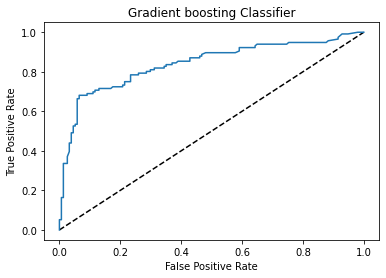

In [105]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient boosting Classifier")
plt.show()

SAVING THE MODEL

In [108]:
import pickle
filename='Titanicfile,pkl'
pickle.dump(gb,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0], dtype=int64)